In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 15)

In [3]:
X_train = pd.read_csv("data/AMF_train_X.csv")
y_train = pd.read_csv("data/AMF_train_Y.csv")
Xy_train = X_train.merge(y_train, how="inner", on=["Trader"])

In [4]:
Xy_train.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [5]:
X_train.shape

(105782, 39)

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105782 entries, 0 to 105781
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

In [7]:
correspondances = {
    1: "NbTradeVenueMic",
    2: "MeanNbTradesBySecond",
    3: "MaxNbTradesBySecond",
    4: "min_dt_TV1",
    5: "mean_dt_TV1",
    6: "med_dt_TV1",
    7: "min_dt_TV1_TV2",
    8: "mean_dt_TV1_TV2",
    9: "med_dt_TV1_TV2",
    10: "min_dt_TV1_TV3",
    11: "mean_dt_TV1_TV3",
    12: "med_dt_TV1_TV3",
    13: "min_dt_TV1_TV4",
    14: "mean_dt_TV1_TV4",
    15: "med_dt_TV1_TV4",
    16: "NbSecondWithAtLeatOneTrade",
    17: "OTR",
    18: "OCR", 
    19: "OMR",
    20: "min_time_two_events",
    21: "mean_time_two_events",
    22: "10_p_time_two_events",
    23: "25_p_time_two_events",
    24: "med_time_two_events",
    25: "75_p_time_two_events",
    26: "90_p_time_two_events",
    27: "max_time_two_events",
    28: "min_lifetime_cancel",
    29: "mean_lifetime_cancel",
    30: "10_p_lifetime_cancel",
    31: "25_p_lifetime_cancel",
    32: "med_lifetime_cancel",
    33: "75_p_lifetime_cancel",
    34: "90_p_lifetime_cancel",
    35: "max_lifetime_cancel"
}

In [9]:
X_test = pd.read_csv("data/AMF_test_X.csv")

In [10]:
random_submission = pd.read_csv("data/random_file.csv") 

In [11]:
random_submission.head()

,Trader,type
0,Adelaide,NON HFT
1,Alana,NON HFT
2,Alcmene,MIX
3,Alice,MIX
4,Alices Sister,NON HFT


In [12]:
y_train.groupby(["type"]).count()

,Trader
type,
HFT,15
MIX,24
NON HFT,47


In [13]:
corr = Xy_train.corr()

<AxesSubplot:>

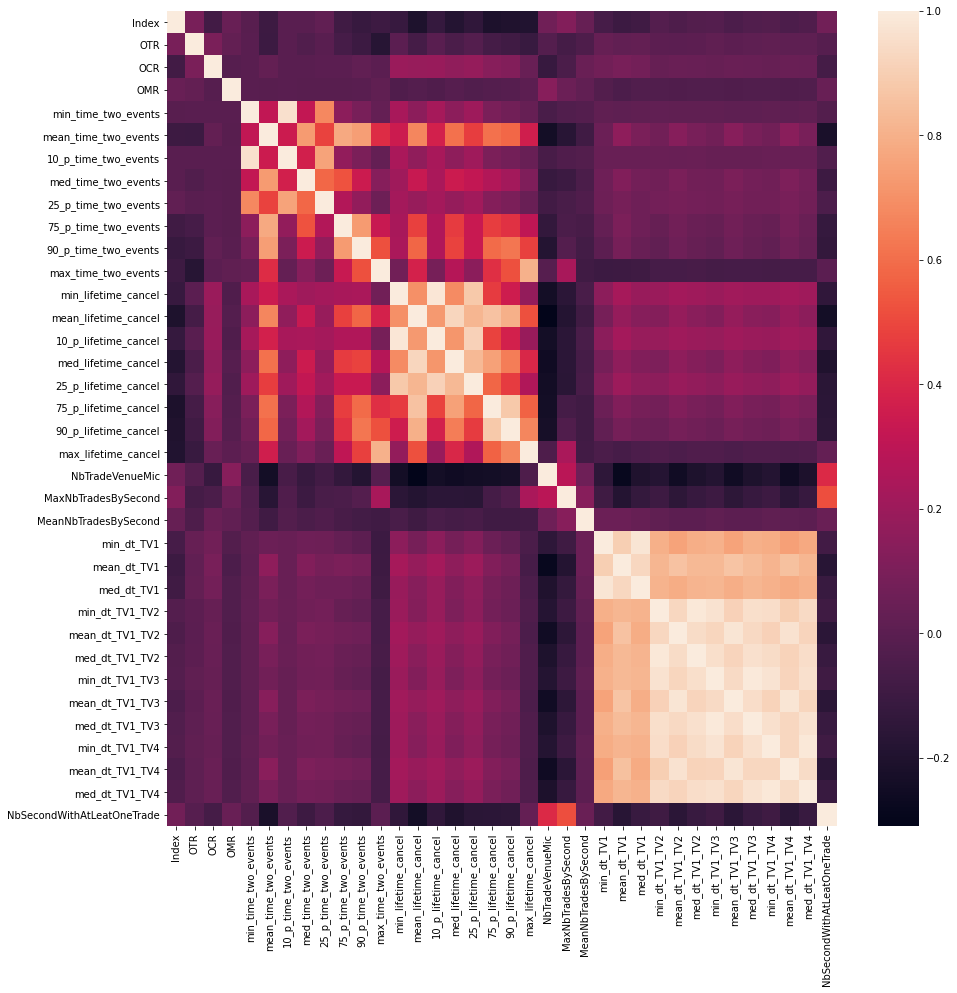

In [14]:
sns.heatmap(corr)

In [15]:
def corr_above_threshold(corr, threshold=0.9):
    corr_threshold = corr.mask((corr < threshold) | (corr == 1.0), 0)
    mask = np.triu(np.ones_like(corr_threshold, dtype=bool))
    sns.heatmap(corr_threshold, mask=mask)

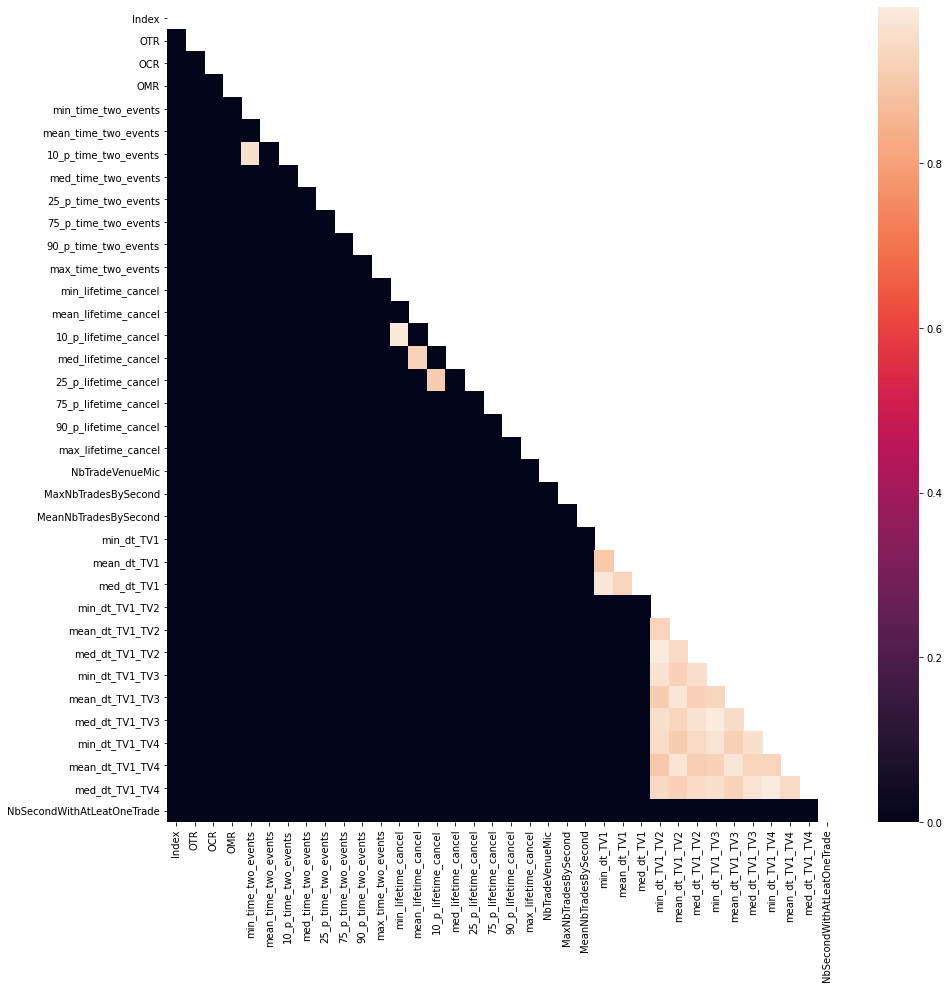

In [16]:
corr_above_threshold(corr, threshold=0.9)

In [17]:
X_train.describe()

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,105782.000000,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,...,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
mean,52891.500000,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,...,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,30536.777425,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,...,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.000000,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,...,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,26446.250000,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,...,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,52891.500000,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,...,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,79336.750000,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,...,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000
max,105782.000000,17561.000000,14409.000000,127861.000000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,60597.414000,...,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,12966.000000


In [18]:
OTR_ratio = 1 / 2.272727
OCR_ratio = 1 / 8.333333
OMR_ratio = 1 / 12.500000
total = OTR_ratio + OCR_ratio + OMR_ratio
OTR_ratio /= total
OCR_ratio /= total
OMR_ratio /= total
print(OTR_ratio)
print(OCR_ratio)
print(OMR_ratio)
print(OTR_ratio + OCR_ratio + OMR_ratio)

0.687500020625001
0.18749999062499925
0.12499998874999976
1.0


In [24]:
def normalize_events(X):
    
    X_transformed = X.copy()
    mask_OTR = X_transformed['OTR'].isna()
    mask_OCR = X_transformed['OCR'].isna()
    mask_OMR = X_transformed['OMR'].isna()
    X_transformed.loc[mask_OTR, 'OTR'] = 0
    X_transformed.loc[mask_OCR, 'OCR'] = 0
    X_transformed.loc[mask_OMR, 'OMR'] = 0
    X_transformed.loc[~mask_OTR, 'OTR'] = 1 / X_transformed['OTR']
    X_transformed.loc[~mask_OCR, 'OCR'] = 1 / X_transformed['OCR']
    X_transformed.loc[~mask_OMR, 'OMR'] = 1 / X_transformed['OMR']
    X_transformed['total'] = X_transformed['OTR'] + X_transformed['OCR'] + X_transformed['OMR']
    X_transformed['OTR'] /=  X_transformed['total']
    X_transformed['OCR'] /=  X_transformed['total']
    X_transformed['OMR'] /=  X_transformed['total']
    X_transformed.drop(['total'], inplace=True, axis=1)
    return X_transformed

In [25]:
normalizer = FunctionTransformer(normalize_events)

In [28]:
pipe = make_pipeline(normalizer)
X_train = pipe.fit_transform(X_train, y_train)

In [31]:
X_train.isna().sum()

Index                             0
Share                             0
Day                               0
Trader                            0
OTR                               0
OCR                               0
OMR                               0
min_time_two_events               0
mean_time_two_events              0
10_p_time_two_events              0
med_time_two_events               0
25_p_time_two_events              0
75_p_time_two_events              0
90_p_time_two_events              0
max_time_two_events               0
min_lifetime_cancel               0
mean_lifetime_cancel              0
10_p_lifetime_cancel              0
med_lifetime_cancel               0
25_p_lifetime_cancel              0
75_p_lifetime_cancel              0
90_p_lifetime_cancel              0
max_lifetime_cancel               0
NbTradeVenueMic                   0
MaxNbTradesBySecond               0
MeanNbTradesBySecond              0
min_dt_TV1                     4235
mean_dt_TV1                 

In [35]:
na_columns = X_train.columns[X_train.isna().any()].tolist()[3:]
na_columns

['min_dt_TV1_TV2',
 'mean_dt_TV1_TV2',
 'med_dt_TV1_TV2',
 'min_dt_TV1_TV3',
 'mean_dt_TV1_TV3',
 'med_dt_TV1_TV3',
 'min_dt_TV1_TV4',
 'mean_dt_TV1_TV4',
 'med_dt_TV1_TV4']

In [42]:
X_train_no_na = X_train.drop(na_columns, axis=1, inplace=False)
X_train_no_na.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,75_p_lifetime_cancel,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,0.687500,0.187500,0.125000,0.0,5117.830300,0.000000,...,23151.83800,23151.8380,23151.838,1,7,2.750000,351.702399,9639.216031,1585.079495,4
1,2,Isin_87,Date_29,Trader_10,0.872549,0.058824,0.068627,0.0,1846.968401,0.000074,...,808.26230,21433.6840,21433.684,1,17,5.933333,0.000066,493.559196,0.000901,15
2,3,Isin_87,Date_23,Trader_10,0.957958,0.030030,0.012012,0.0,686.300630,0.000071,...,418.23984,1953.6235,10842.464,1,20,5.063492,0.000018,163.954785,0.000770,63
3,4,Isin_12,Date_11,Trader_10,0.850000,0.100000,0.050000,0.0,2174.335265,0.000000,...,19187.71900,19187.7190,19187.719,1,8,4.250000,0.000148,1232.562133,0.004301,4
4,5,Isin_87,Date_9,Trader_10,0.946309,0.053691,0.000000,0.0,944.008551,0.000071,...,21903.78300,23164.5140,23164.514,1,19,3.710526,0.000025,248.073927,0.001364,38


In [43]:
y_train.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [40]:
pca = PCA(n_components=len(X_train_na.columns))
pca.fit(X_train_na)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

ValueError: could not convert string to float: 'Isin_8'

In [74]:
lol = X_train.duplicated(['Share', 'Day', 'Trader']).sum()

In [72]:
X_train[lol == True]

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
12076,12077,Isin_117,Date_9,Trader_161,0.445693,0.554307,0.000000,0.0,12115.814836,0.000000,...,0.000002,13.915678,0.104199,0.000001,15.976943,0.104205,0.000107,16.201066,0.104212,407
12077,12078,Isin_117,Date_9,Trader_161,0.445693,0.554307,0.000000,0.0,12115.814836,0.000000,...,0.000002,13.915678,0.104199,0.000001,15.976943,0.104205,0.000107,16.201066,0.104212,407
12079,12080,Isin_120,Date_23,Trader_161,0.102186,0.795628,0.102186,0.0,1050.007427,0.000005,...,0.000022,87.545981,4.317586,0.000005,88.706144,2.853250,0.000022,91.453300,4.317586,117
12080,12081,Isin_120,Date_23,Trader_161,0.102186,0.795628,0.102186,0.0,1050.007427,0.000005,...,0.000022,87.545981,4.317586,0.000005,88.706144,2.853250,0.000022,91.453300,4.317586,117
12082,12083,Isin_27,Date_15,Trader_161,0.056845,0.528729,0.414426,0.0,427.391180,0.000501,...,0.000001,6.227836,0.107766,0.000002,7.473614,0.083597,0.000016,7.217615,0.075524,1262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93452,93453,Isin_33,Date_9,Trader_430,0.809211,0.190789,0.000000,0.0,9093.508532,0.000000,...,0.000398,141.471283,42.324000,0.000630,173.866631,70.654103,0.000488,200.051524,54.288000,256
93454,93455,Isin_44,Date_23,Trader_430,0.904348,0.095652,0.000000,0.0,5369.416532,0.000000,...,0.000385,96.671625,20.210410,0.000385,89.336533,15.349000,0.000300,111.322551,16.892077,172
93456,93457,Isin_64,Date_29,Trader_430,0.837165,0.111111,0.051724,0.0,4470.089493,0.000000,...,0.000473,98.145207,52.825350,0.000585,101.344097,55.801273,0.000585,105.312413,53.579806,321
93458,93459,Isin_68,Date_9,Trader_430,0.859649,0.140351,0.000000,0.0,5564.903608,0.000000,...,0.000394,299.079996,202.492376,0.000922,206.393690,111.437766,0.000238,235.674171,87.016124,92


In [75]:
X_train.isna().sum()

Index                             0
Share                             0
Day                               0
Trader                            0
OTR                               0
OCR                               0
OMR                               0
min_time_two_events               0
mean_time_two_events              0
10_p_time_two_events              0
med_time_two_events               0
25_p_time_two_events              0
75_p_time_two_events              0
90_p_time_two_events              0
max_time_two_events               0
min_lifetime_cancel               0
mean_lifetime_cancel              0
10_p_lifetime_cancel              0
med_lifetime_cancel               0
25_p_lifetime_cancel              0
75_p_lifetime_cancel              0
90_p_lifetime_cancel              0
max_lifetime_cancel               0
NbTradeVenueMic                   0
MaxNbTradesBySecond               0
MeanNbTradesBySecond              0
min_dt_TV1                     4235
mean_dt_TV1                 

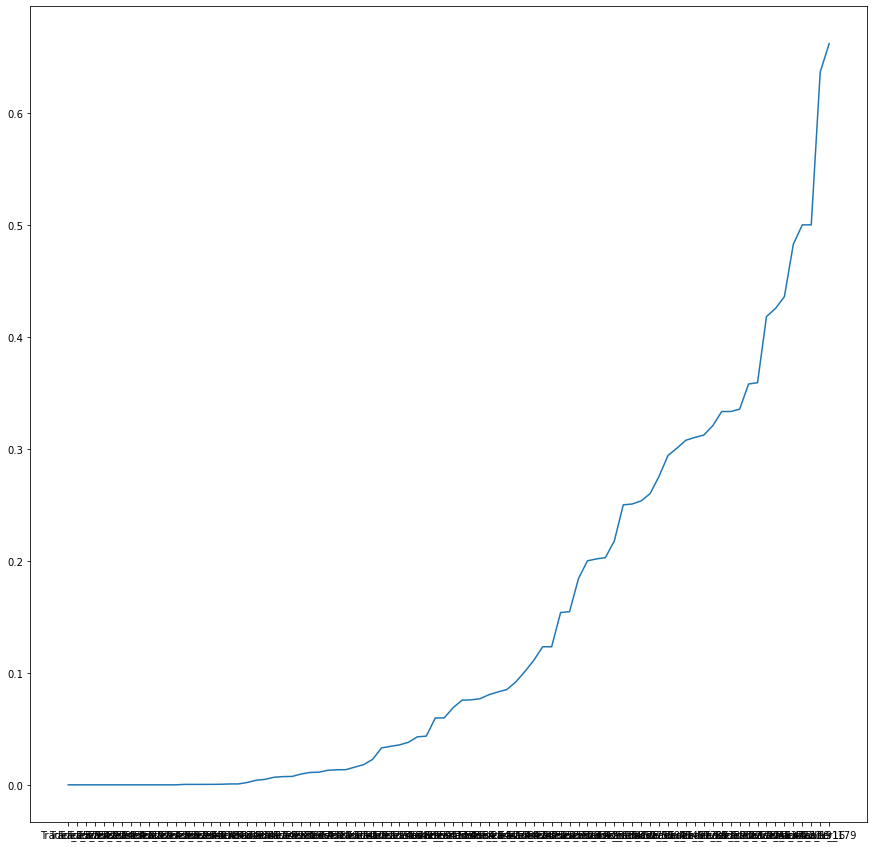

In [107]:
col = 'min_dt_TV1'
tmp = X_train.copy()
tmp[col] = ~tmp[[col]].notna()
gb2 = tmp.groupby(['Trader'], dropna=False).count()
gb = tmp.groupby(['Trader'], dropna=False).sum()
gb = gb[col] / gb2[col]
plt.plot(gb.sort_values())

In [108]:
max(X_train['min_dt_TV1'])

30929.771